# Modern Portfolio Theory: Creating The Most Efficient Portfolio

In this project we are going apply Modern Portfolio Theory (MPT) by Markowitz on Python. Modern Portfolio Theory is used for portfolio selection (any number of stocks) and gives investors information on how much of money should they invest in each stock, depending on their risk tolerance, in order to maximize their expected returns.

Like most theories, MPT relies on some real world assumptions:

- Investors are rational and avoid risks as much as possible 
- Investors aim for the maximum returns for their investments 
- All investors share the aim of maximizing their expected returns 
- Commissions and taxes are left out of the considerations 
- All investors have access to the same sources and levels of all necessary information about their investment decisions 
- Investors have unlimited access to borrow and lend money at risk-free rate 

The most important point of this theory is that investors can construct an "efficient set of portfolios" (Efficient Frontier) that offers maximum expected returns for a given level of risk. An investor with low risk tolerance chooses the maximum expected returns given the lowest possible risk, and those with the highest risk tolerance will choose "high risk, high reward" portfolios.

Professor Markowitz realized that by constructing multiple portfolios with different combinations of securities (diversification), investors can achieve a maximum expected return given their risk preferences. In other words, returns of a portfolio are greatly affected by the relationship between assets and their assigned weights in the portfolio.

In this project, we will be pulling data using the Quandl API, which is a platform for financial, economic, and alternative data that serves investment professionals. The link to the website can be found below:

https://www.quandl.com

First you have to register an account on the website, as well as add it to your Python library (you can use pip or any Python distribution of your choice).

To begin, let us import our required libraries. In this project we will be using: 

- Quandl (To get our data)
- Pandas (Combine the data in a dataframe for analysis)
- Numpy (Perform a series of calculations)
- Matplotlib (Graphing the Efficient Frontier)

In [31]:
import quandl 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

Once you have registered an account on Quandl, you will be given an API key for you to save. An API key allows you to make more than 50 calls a day in Quandl, provided that you use it frequently enough when you are working on finance in Python.

In personal applications you do not have to worry about this, but in some settings that require you to show your work to others, you might want to save the API key in a text file (.txt) and access it through Python in a manner that does not allow others to view your API key when they see your code.

In this case, I have saved my API key inside a file called "quandlapi.txt" and will access it through Python. Note that your Python script and the API key text file should be in the same directory (for convenience). 

In [38]:
# Access the API key and place it in a variable
quandl_api_key = open('quandlapi.txt','r').read()

# Access Quandl using your API key
quandl.ApiConfig.api_key = quandl_api_key

Now, we can select a number of different assets for our portfolio. In this project we will stick to five:

- Coca-Cola
- Microsoft 
- Pepsi
- General Electric 
- NVIDIA

We will place the ticker symbols of each asset inside a Python list, and then call the data from the Quandl API.

In [40]:
selected = ['KO', 'MSFT', 'PEP', 'GE', 'NVDA']

# Calling data from Quandl and placing them inside a variable
data = quandl.get_table('WIKI/PRICES', ticker = selected,
                        qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
                        date = { 'gte': '2017-1-1', 'lte': '2018-1-1' }, paginate=True)

Let's break this down. the ".get_table" method is used to call the data from the API, and in this case it comes with several parameters. As shown in the code above, we will be pulling data from WIKI daily stock prices, and the list of assets we want are passed on as a list of tickers we just created. 

The "qopts" parameter than comes after that is used when we want to only take certain columns from the dataset inside WIKI. In this case, we specify that we only need the date, the ticker symbol, and the adjusted close price. 

For the "date" parameter, we specify that we want data that is greater than / equal to January 1st, 2017 and less than / equal to January 1st, 2018. In other words, we want to pull one year of data from WIKI. 

Lastly, for tables API Quandl by default only allows 10,000 rows per call, but in Python we can set "paginate = True" to extend the number of rows to 1,000,000 per call. 

Now let's check the data (print the first 5 rows):

In [41]:
data.head()

,date,ticker,adj_close
None,,,
0,2017-01-03,GE,30.870473
1,2017-01-04,GE,30.880215
2,2017-01-05,GE,30.704870
3,2017-01-06,GE,30.792542
4,2017-01-09,GE,30.646421


As we can see here, Quandl did manage to pull all of the data that is required. However, note that it is in a form where all the tickers are fitted inside one column going down, which makes it incovenient for our data analysis purposes. 

What we want is to set the date as the index of our dataframe, while each ticker (and its corresponding adjusted close prices) gets its own column, and we are going to do just that.

In [11]:
clean_table = data.set_index('date').pivot(columns = 'ticker')

# Check the data now
clean_table.head()

adj_close                                              
ticker             GE         KO       MSFT        NVDA         PEP
date                                                               
2017-01-03  30.870473  40.770394  61.219142  101.688849  102.510035
2017-01-04  30.880215  40.624089  60.945231  104.061357  102.705946
2017-01-05  30.704870  40.721626  60.945231  101.419699  102.568808
2017-01-06  30.792542  40.711872  61.473488  102.775418  102.421876
2017-01-09  30.646421  40.302218  61.277837  106.942258  101.344369

Now that the dataframe is in a form that is more useful for our analysis, we want to get into both the daily and annual returns of each stock. To do that, we first find the daily percentage change of each stock, and then multiply the mean of those returns by 252 days (in the US there are 252 trading days in a year). 

In [12]:
daily_returns = clean_table.pct_change()
annual_returns = daily_returns.mean() * 252 # number of trading days

# Check the daily returns data
daily_returns.head()

adj_close                                        
ticker            GE        KO      MSFT      NVDA       PEP
date                                                        
2017-01-03       NaN       NaN       NaN       NaN       NaN
2017-01-04  0.000316 -0.003589 -0.004474  0.023331  0.001911
2017-01-05 -0.005678  0.002401  0.000000 -0.025386 -0.001335
2017-01-06  0.002855 -0.000240  0.008668  0.013367 -0.001433
2017-01-09 -0.004745 -0.010062 -0.003183  0.040543 -0.010520

Of course, the first row is not available because there is no row before that to calculate the percentage change from that point. However, it will not affect our analysis at all. Let's also check the annual returns of our data for each stock:

In [13]:
annual_returns.head()

           ticker
adj_close  GE       -0.556658
           KO        0.123537
           MSFT      0.349675
           NVDA      0.731674
           PEP       0.163497
dtype: float64

We also want to find the daily and annual covariance of the returns of each stock to perform calculations of the metrics that we will use for our investment decisions, which will be explained further later. For now, the method of doing so in Python is very similar, where we get the daily covariance and multiply it by 252 trading days to get to the annual covariance.

In [14]:
daily_covariance = daily_returns.cov()
annual_covariance = daily_covariance * 252 

In [15]:
# Here is what the daily covariance looks like
daily_covariance.head()

adj_close                                            
ticker                      GE            KO      MSFT      NVDA       PEP
          ticker                                                          
adj_close GE      1.569374e-04  7.089513e-08 -0.000005  0.000001 -0.000003
          KO      7.089513e-08  3.192807e-05  0.000002 -0.000001  0.000022
          MSFT   -5.255366e-06  1.878515e-06  0.000087  0.000079  0.000009
          NVDA    1.414585e-06 -1.235003e-06  0.000079  0.000645  0.000005
          PEP    -2.528260e-06  2.191693e-05  0.000009  0.000005  0.000037

In [16]:
# Here is what the annual covariance looks like
annual_covariance.head()

adj_close                                        
ticker                  GE        KO      MSFT      NVDA       PEP
          ticker                                                  
adj_close GE      0.039548  0.000018 -0.001324  0.000356 -0.000637
          KO      0.000018  0.008046  0.000473 -0.000311  0.005523
          MSFT   -0.001324  0.000473  0.022012  0.020000  0.002216
          NVDA    0.000356 -0.000311  0.020000  0.162588  0.001275
          PEP    -0.000637  0.005523  0.002216  0.001275  0.009422

Moving on to the actual analysis, we will need 4 types of information to form our efficient frontier graph: 

- Portfolio Returns 
- Portfolio volatility
- Sharpe Ratio 
- Weight of each stock 

Where each plot in our graph will be (x, y) -> (Volatility, Returns) of one combination of stocks (one portfolio).

The weights of each stock is simply the percentage weight of the total amount of money you invest that you specifically put into the corresponding asset. In other words, the combined weights of all stocks must be equal to 1.

We also add an additional metric called the Sharpe Ratio. Basically, Sharpe ratio is a measure of the performance of an investment's returns given its risk. Using the sharpe ratio makes it possible for us to compare different investment combinations on a scale that takes risk into account. 

The formula of Sharpe ratio is as follows: 

(Expected Return - Risk-free Rate of Return) / Portfolio Standard Deviation

In this project, we will assume the risk-free rate of return to be 0 for simplification. The risk-free rate refers to the theoretical rate of return of an investment with ZERO risk. The closest we can get is the interest rate of government treasury bonds. If you want to change the risk-free rate to be higher than zero, all you need to do is change the formula in the Python implementation below (will be marked).

Generally, a sharpe ratio of more than 1 is deemed "acceptable" to "good" by investors. A sharpe ratio of more than 2 is rated as "very good", and a sharpe ratio of more than 3 is rated as "excellent".

Moving on, we will be creating the 4 types of information that we need as empty lists:

In [42]:
portfolio_returns = []
portfolio_volatility = []
sharpe_ratio = []
stock_weights = []

Next, we specify the number of assets in our porfolio (take the length of the list of assets we created before) and we also specify that we want to make 50,000 asset combinations (portfolios) to create our efficient frontier graph.

In [18]:
num_assets = len(selected)
num_portfolios = 50000

We will also use Numpy to create a random seed. The purpose of a random seed is to replicate computations that uses random variables.

In [19]:
np.random.seed(101)

Now, we will iterate through each asset combination within the 50,000 portfolios with different weights that we just created. In each iteration, we will compute the weights, returns, volatility and sharpe ratio of each portfolio. 

In [21]:
for single_portfolio in range(num_portfolios):
    
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    returns = np.dot(weights, annual_returns)
    
    volatility = np.sqrt(np.dot(weights.T, np.dot(annual_covariance, weights)))
    
    sharpe = returns / volatility # Modify this formula if you add risk-free rate to sharpe ratio formula
    sharpe_ratio.append(sharpe)
    
    portfolio_returns.append(returns)
    portfolio_volatility.append(volatility)
    
    stock_weights.append(weights)

Let's break it down. 

For the weights, we will generate a random number from the number of assets (in this case 5) and then divide it by the sum of all weights, essentially creating a percentage value for the weight of each asset that sums up to 1. 

The returns will be a dot product of the weights and annual returns. To avoid making it complicated, a dot product here simply means that you take each corresponding value in the weights and annual returns list, multiply them, and add the results all together. 

Volatility (or standard deviation) is calculated as the square root of the covariance, but we have to be very careful with this calculation. In our case, we first take the dot product (explained above) of the annual covariance and the weights of each asset, then perform a dot product on THOSE results with the "transposed" weights of each asset in each portfolio.

Lastly, we create the sharpe ratio formula (without the risk-free rate of return). 

Then, we append the results of each iteration to the corresponding four empty lists that we created before this loop.

Next, we want to create a table that shows us the returns, volatility, sharpe ratio and weights of each generated portfolio, which will involve several steps. 

The first one is to include create a dictionary with the portfolio returns, volatility and sharpe ratio that we just created using the for loop above.

In [22]:
portfolio = {'Returns': portfolio_returns,
             'Volatility': portfolio_volatility,
             'Sharpe Ratio': sharpe_ratio}

We can further populate our Python dictionary with the weights of each stock in each portfolio. To do that, we create another for-loop that iterates through the list of selected assets. Inside the first for-loop, we create another for-loop that iterates through each stock_weights we have computed before (a total of 50,000). Therefore, we have 50,000 different versions of weights for each of the five stocks we have selected.

In [24]:
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

Finally, we turn the dictionary into a pandas dataframe that we can print out to check. We simply need to add the column names for each column as shown below, and print out the first 15 rows of data:

In [27]:
df = pd.DataFrame(portfolio)
# Name the columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]
# Add the column names + data into the new dataframe
df = df[column_order]

# Let's check the data
df.head(15)

,Returns,Volatility,Sharpe Ratio,KO Weight,MSFT Weight,PEP Weight,GE Weight,NVDA Weight
0,0.151119,0.134391,1.124467,0.283065,0.104199,0.303335,0.244927,0.064474
1,0.187102,0.129137,1.448869,0.195196,0.124019,0.064062,0.276685,0.340038
2,0.348406,0.177046,1.967881,0.120722,0.043415,0.313581,0.378758,0.143523
3,-0.107268,0.101201,-1.059955,0.434703,0.328493,0.030755,0.087453,0.118597
4,0.100717,0.118721,0.848348,0.295001,0.154475,0.171719,0.218011,0.160793
5,0.043555,0.085514,0.509330,0.265902,0.235259,0.117349,0.104020,0.277469
6,0.214449,0.095497,2.245604,0.098191,0.247197,0.237247,0.153776,0.263590
7,0.451723,0.208997,2.161381,0.049779,0.052701,0.359463,0.456296,0.081761
8,0.252037,0.136430,1.847379,0.119743,0.292213,0.071394,0.304762,0.211889
9,-0.020250,0.092091,-0.219893,0.332888,0.255065,0.021223,0.109517,0.281306


Here we can split the data into two types of efficient portfolios: 

1. We want the portfolio with the maximum expected returns given the minimum amount of risk taken (for investors with low level of risk tolerance). This takes the volatility (standard deviation) of the portfolio as the most important factor

2. We want the portfolio with the maximum expected returns given any level of risk (for investors with highe level of risk tolerance). This takes the Sharpe ratio of the portfolio as the most important factor.

For number 1, we simply need to find the smallest volatility value. For number 2, we find the highest sharpe ratio value. 

In [28]:
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

We then simply locate the two portfolios within our dataframe that each corresponds with these values.

In [29]:
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

Finally, we plot these dataframes into the graph. We will not spend time defining the parameters for the style of the graph. The most important part is that as mentioned before, each plot in the graph (x, y) refers to (Volatility, Returns) of each portfolio. 

Furthermore, since we already have 2 kinds of portfolios (minimum volatility & maximum sharpe ratio), we can annotate them with a different color. In this case, the one with the lowest volatility is colored red, and the one with the highest sharpe ratio is colored blue. We also want to give a range of sharpe ratio from lowest to highest using some kind of heatmap, as shown in the graph below.

Text(0.5,1,'Efficient Frontier')

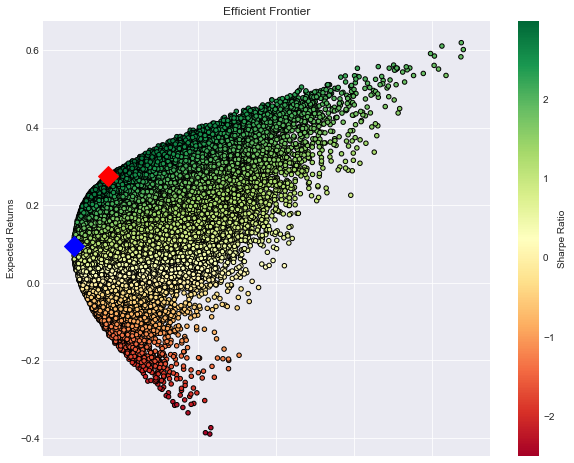

In [33]:
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')

Finally, we print the details of two most efficient portfolios. The one that the investor chooses depends on his/her risk tolerance.

In [36]:
print("Minimum Volatility Efficient Portfolio:")
min_variance_port.T

Minimum Volatility Efficient Portfolio:


,47873
Returns,0.095344
Volatility,0.070173
Sharpe Ratio,1.358691
KO Weight,0.123635
MSFT Weight,0.482410
PEP Weight,0.174215
GE Weight,0.013598
NVDA Weight,0.206143


In [37]:
print("Maximum Sharpe Ratio Efficient Portfolio:")
sharpe_portfolio.T

Maximum Sharpe Ratio Efficient Portfolio:


,31259
Returns,0.275093
Volatility,0.092282
Sharpe Ratio,2.981018
KO Weight,0.000938
MSFT Weight,0.265382
PEP Weight,0.395600
GE Weight,0.086636
NVDA Weight,0.251444


©Regio Abundan. May 29th, 2018.